In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x = np.random.normal(100, 30, 100_000)

In [10]:
x = pd.Series(x)

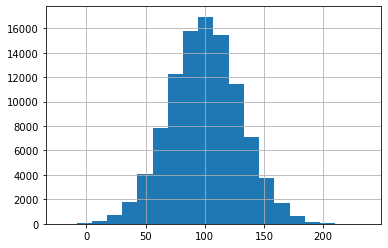

In [12]:
x.hist(bins=20)

### InterQuartile Range Rule
1. Calculate the 1st and 3rd quartile numbers
2. Calculate IQR = q3 - q1
3. Determine our multiplier (1.5 or 3)
4. Set the lower bound to be q1 - iqr * multiplier
5. Set the upper bound to be q3 + iqr * multiplier
6. Use the upper bound and lower bound to identify the observations outside those bounds
7. Determine what to do with those outliers?

In [35]:
# Let's use the IQR rule to detect upper and lower bound outliers

In [36]:
x.describe()

count    100000.000000
mean         99.993722
std          29.907773
min         -21.176239
25%          79.783482
50%          99.907527
75%         120.054990
max         235.785107
dtype: float64

In [18]:
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)

q1, q3

(79.7834821576246, 120.0549903108112)

In [19]:
iqr = q3 - q1
iqr

40.2715081531866

In [29]:
# Set the IQR multiplier to 1.5 to find the mild outliers
multiplier = 1.5

In [30]:
iqr * multiplier

60.4072622297799

In [31]:
# lower outer fence: Q1 - 3*IQR
lower_fence = q1 - multiplier*iqr
lower_fence

19.3762199278447

In [32]:
upper_fence = q3 + multiplier*iqr
upper_fence

180.46225254059112

In [33]:
# Let's isolate the lower outliers from x
x[x <= lower_fence]

433      14.513296
575      15.288537
681      14.798788
859      16.808122
939      13.519334
           ...    
99163    12.358128
99307    15.977842
99413    13.360158
99554    10.642004
99790     6.398111
Length: 362, dtype: float64

In [34]:
x[x >= upper_fence]

656      197.744651
894      184.664915
1037     189.446149
1392     192.126703
1501     198.673637
            ...    
98315    187.410780
98637    193.408054
98791    187.464839
99714    187.254892
99815    184.251131
Length: 359, dtype: float64

## Let's use the Empircal Rule

In [37]:
zscores = (x - x.mean()) / x.std()

In [39]:
df = pd.DataFrame()
df["x"] = x
df["zscore"] = abs(zscores)

In [40]:
df.head()

,x,zscore
0,94.873445,0.171202
1,92.869446,0.238208
2,88.556922,0.382402
3,92.918316,0.236574
4,162.975712,2.105874


In [41]:
# Let's find all the values that are more than 3+ standard deviations from the mean
df[zscores >= 3]

,x,zscore
656,197.744651,3.268412
1392,192.126703,3.080570
1501,198.673637,3.299474
2395,195.734975,3.201216
2600,191.789589,3.069298
...,...,...
95784,196.626570,3.231028
97254,195.161472,3.182041
97838,200.486969,3.360105
97897,194.751239,3.168324


In [42]:
# Let's find all the values that are more than 2+ standard deviations from the mean
df[zscores >= 2]

,x,zscore
4,162.975712,2.105874
17,162.609315,2.093623
58,168.378531,2.286523
136,171.142395,2.378936
160,167.904385,2.270669
...,...,...
99714,187.254892,2.917675
99749,170.825456,2.368339
99815,184.251131,2.817241
99841,170.423513,2.354899


In [44]:
# How many observations are within 1 standard deviation?>
df[zscores <= 1]

,x,zscore
0,94.873445,0.171202
1,92.869446,0.238208
2,88.556922,0.382402
3,92.918316,0.236574
5,62.163690,1.264890
...,...,...
99995,108.705932,0.291303
99996,68.502506,1.052944
99997,81.577156,0.615779
99998,125.776192,0.862066


In [45]:
84179 / 100_000

0.84179

In [46]:
# How many observations are within 2 standard deviations?
df[zscores <= 2]

,x,zscore
0,94.873445,0.171202
1,92.869446,0.238208
2,88.556922,0.382402
3,92.918316,0.236574
5,62.163690,1.264890
...,...,...
99995,108.705932,0.291303
99996,68.502506,1.052944
99997,81.577156,0.615779
99998,125.776192,0.862066


In [47]:
# How many observations are within 3 standard deviations?
df[zscores <= 3]

,x,zscore
0,94.873445,0.171202
1,92.869446,0.238208
2,88.556922,0.382402
3,92.918316,0.236574
4,162.975712,2.105874
...,...,...
99995,108.705932,0.291303
99996,68.502506,1.052944
99997,81.577156,0.615779
99998,125.776192,0.862066
